# Importing Libraries

In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import math

# Creating Figure and Axes

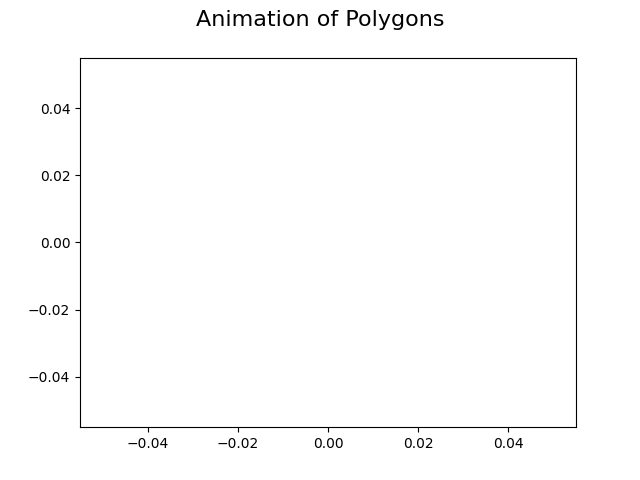

In [2]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'b')
fig.suptitle('Animation of Polygons', fontsize=16)

def init():
    ax.set_xlim(-1.2, 1.2) # initialize the range of x axis
    ax.set_ylim(-1.2, 1.2) # initialize the range of y axis
    return ln,

In this code , we initialize the x axis range and the y-axis range 

# Polygon():

In [3]:
def polygon(n):
    if n < 3:
        return polygon(3)

    theta = 360
    t = theta / n #Angle from centre to adjacent vertices of polygon
    x = [] # list to take the x-coordinates
    y = [] # list to take the y-coordinates
    for i in range(n):
        x.append(np.cos(t * i * np.pi / 180)) 
        x.append(np.cos(t * i * np.pi / 180)) # duplicate x coordinate
        y.append(np.sin(t * i * np.pi / 180))
        y.append(np.sin(t * i * np.pi / 180)) # duplicate y coordinate

    x.append(np.cos(t * (i+1) * np.pi / 180)) # to ensure we get closed figure
    y.append(np.sin(t * (i+1) * np.pi / 180)) # to ensure we get closed figure

    x , y = np.array(x) , np.array(y)
    return x, y

- In the Assignment problem each polygon has its vertices on a circle with unit radius and its centre at origin

- Polygon() function will take n as an argument to create a polygon of n sides

- All vertices of the polygon are appended in a list but while doing so I have taken duplicates of each vertices .

- This is to ensure that when we do vertex splitting , we can map the same vertex to two different vertices.


# Dataset():

In [4]:
def dataset(x2 , y2):
    xnew = []
    ynew = []
    n = len(x2)-1 
    for i in range(0 , n , 2):
        xnew.append(x2[i]) # first mapping 
        xnew.append(x2[i+2]) # second mapping
        ynew.append(y2[i]) # first mapping
        ynew.append(y2[i + 2]) # second mapping
    xnew.remove(x2[-2]) # to remove the repetative case
    ynew.remove(y2[-2]) # to remove the repetative case
    xnew , ynew = np.array(xnew) , np.array(ynew)
    return xnew , ynew 

- When we go from one polygon to other one , we have to ensure that the length of both the datasets are `same`.  

- In this Function , I am taking the `x` and `y` coordinates of the coming Polygon , and mapping it with the original polygon such that they can be morphed using **Vertex Splitting**.   

- example : If I assume the initial points of a Triangle as **[l , l , m , m, n , n , l]**  and the Sqaure formed from these has the points **[a , a , b , b , c , c , d , d , a ]** . 

- Then `dataset()` function will create a new list of points of Square such that they get morphed with the Points of triangle. Thus , our function inn this case will return the points **[a , b , b , c , c , d , a ]** . 

# Update and Morphing

In [5]:
def update(frame):

    if int(frame) < no//2 :
        x1, y1 = polygon(int(frame) + 3)
        x2, y2 = polygon(int(frame) + 4)
        x2, y2 = dataset(x2, y2)
        xdata, ydata = morph(x2, y2, x1, y1, frame - int(frame))
        ln.set_data(xdata, ydata)
        return ln,

    else:
        p = n + no//2 - int(frame)
        x1, y1 = polygon(p - 1)
        x2, y2 = polygon(p)
        x2, y2 = dataset(x2, y2)
        xdata, ydata = morph(x1 , y1 , x2 , y2 , frame - int(frame))
        ln.set_data(xdata, ydata)
        return ln,
    
    
def morph(x1, y1, x2, y2, alpha):
    xm = alpha * x1 + (1-alpha) * x2
    ym = alpha * y1 + (1-alpha) * y2
    return xm, ym

- Update() function takes in the argument `frame` . `Frames` are defined in the FuncAnimation() class where we go from `0` to `no` in uniform intervals, where no is such that we get the forward as well as the backward animation .   



- When the frame goes from 0 to 1 or from 1 to 2 we change the animation from one polygon to another .



- In this Function what happens is we take in the coordinates of the polygons, and simply use the morph function to go from one polygon to another in such a way that it looks like the Splitting of vertices.



- The Morph() function takes in the dataset of both polygons and returns another dataset which shows the animation of the polygon going from one to another. How fast the polygon changes its form depennds on the learning rate alpha which in this case is nothing but `frame` . So if we keep the iterations of `Frames` low , we will get a animation which will convert from one form to another quickly .



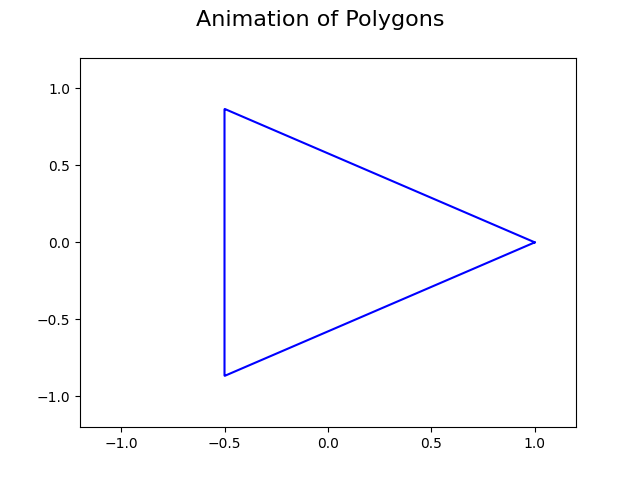

In [9]:
n = 5 # till which Polygon to go
no = 2*(n-3) + 1 # for Forward and backward animation
ani1 = FuncAnimation(fig, update, frames=np.linspace(0 , no , 128*no) ,  init_func=init, blit=True, interval=2, repeat=False)
plt.show()

- Here , `n` is the input which tells us till what polygon should it be animated . 

- `no` is simply a variable for keeping track of forward and backward animation.

- Finally , we plot the animation by calling FuncAnimation .